In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, r2_score

In [30]:
data = pd.read_excel("cardic_data.xlsx")

In [31]:
data.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
data.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [44]:
for i in data.select_dtypes("object"):
    print (i)
    print (data[i].value_counts(),'\n')

SEXE
homme    725
femme    193
Name: SEXE, dtype: int64 

TDT
ASY    496
DNA    203
AA     173
AT      46
Name: TDT, dtype: int64 

ECG
Normal    552
LVH       188
ST        178
Name: ECG, dtype: int64 

ANGINE
Non    547
Oui    371
Name: ANGINE, dtype: int64 

PENTE
Plat          460
Ascendant     395
Descendant     63
Name: PENTE, dtype: int64 



In [61]:
numeriq = data.select_dtypes("int64").columns
numeriq

Index(['AGE', 'PAR', 'CHOLESTEROL', 'GAJ', 'FCMAX', 'CŒUR'], dtype='object')

In [49]:
catego = data.select_dtypes("object").columns
catego

Index(['SEXE', 'TDT', 'ECG', 'ANGINE', 'PENTE'], dtype='object')

In [57]:
dt = data[["AGE", "PAR", "CHOLESTEROL", "FCMAX", "DEPRESSION "]]

In [58]:
liste = ["AGE", "PAR", "CHOLESTEROL", "FCMAX", "DEPRESSION "]

In [59]:
dt.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


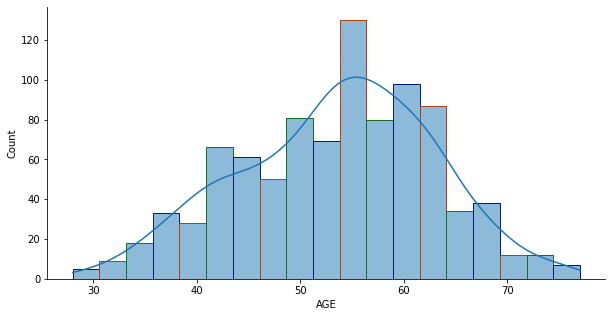

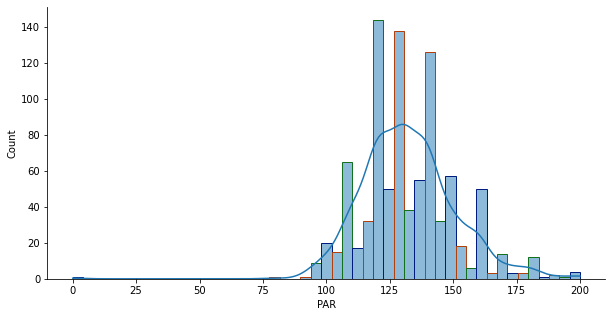

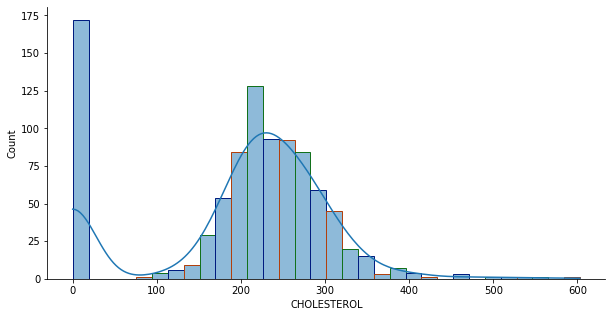

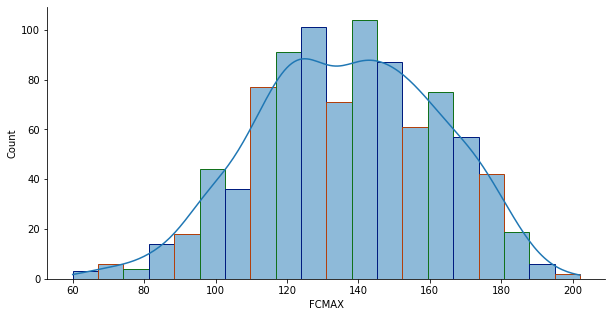

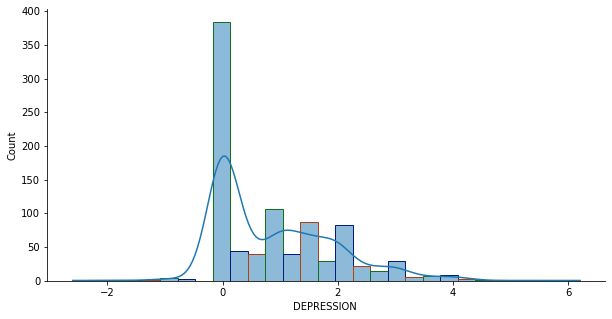

In [64]:
for j in liste:
    plt.figure(figsize=(10,5))
    sns.histplot(x=dt[j], palette=sns.color_palette("pastel"), edgecolor=sns.color_palette("dark", 3), kde=True)
    sns.despine()

## On observe la distribution des valeurs pour chacune des variables quantitative, globalement on observe une ditribution approximativement normal, sauf la depression.

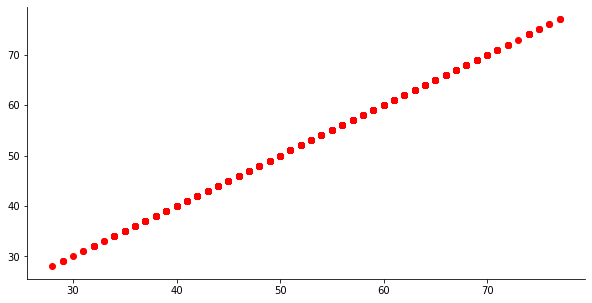

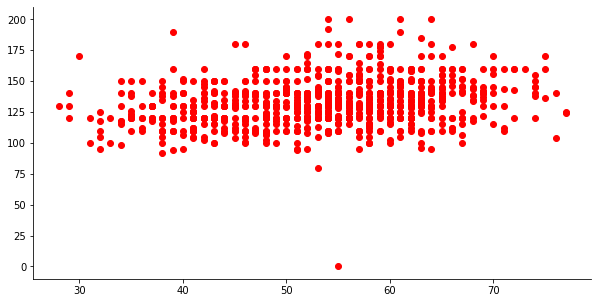

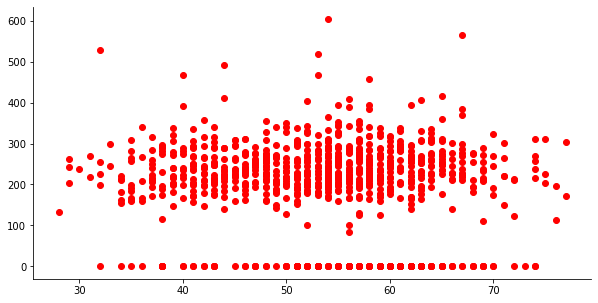

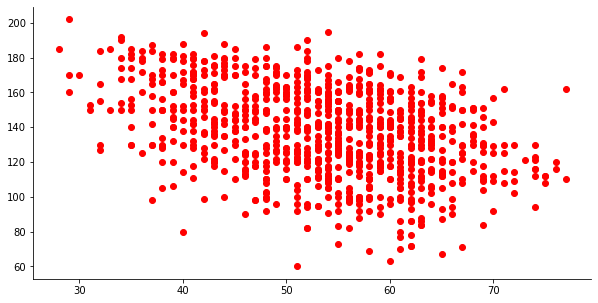

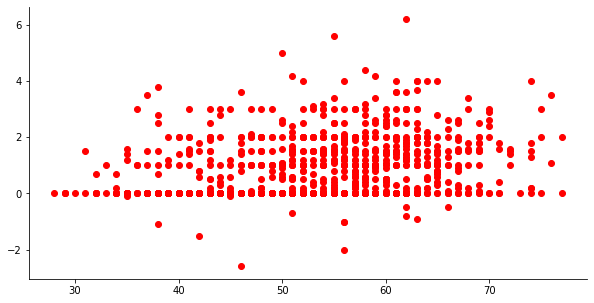

In [65]:
for k in liste:
    plt.figure(figsize=(10,5))
    plt.scatter(data["AGE"], dt[k], c = ['red'])
    #pyplot.scatter(x, y2, c = 'yellow')
    sns.despine()

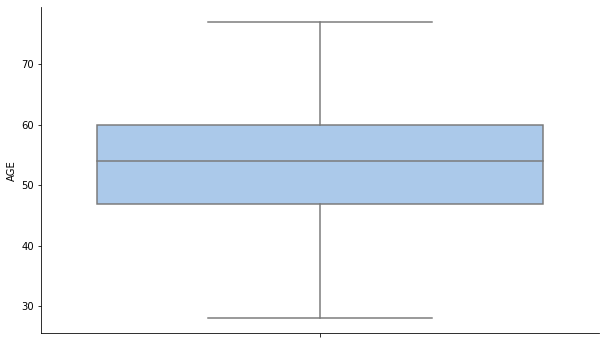

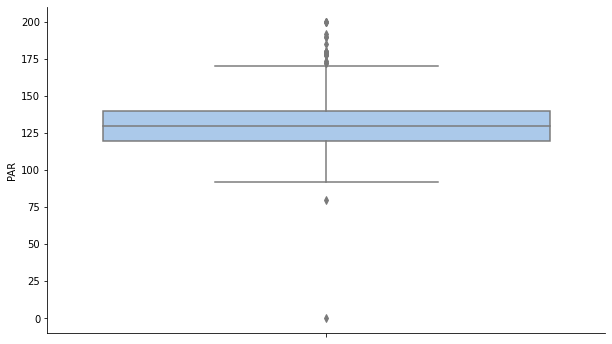

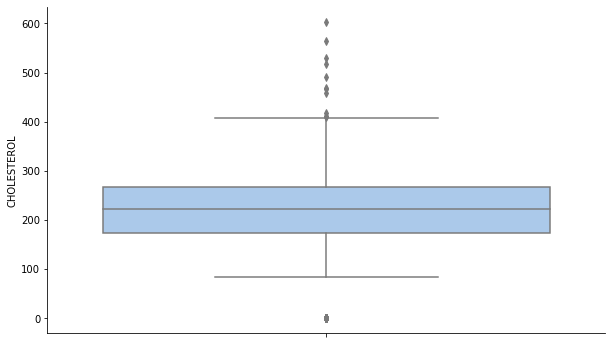

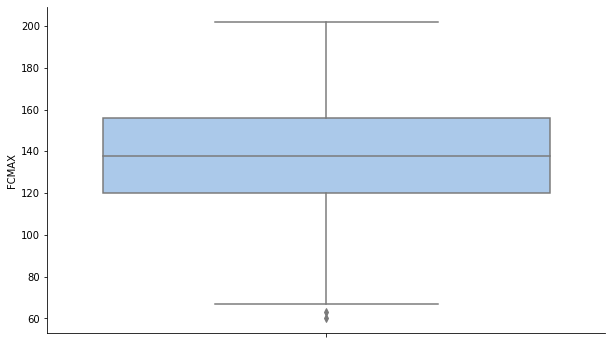

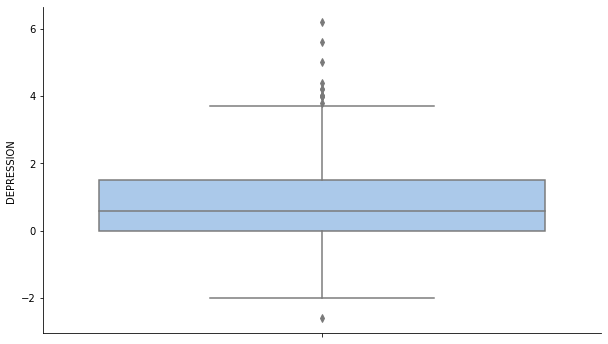

In [66]:
for i in dt:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=dt, y=i, palette=sns.color_palette("pastel"))
    sns.despine()

## On distingue ainsi clairement les valeurs aberentes pour chacune des variables quantitatifs, on poura ainsi entreprendre une demarche juditieuse pour les traiter

In [67]:
data.groupby(['SEXE'])['CŒUR'].aggregate('count').reset_index().sort_values('SEXE',ascending=False)

,SEXE,CŒUR
1,homme,725
0,femme,193


In [68]:
data.groupby(['TDT'])['CŒUR'].aggregate('count').reset_index().sort_values('TDT',ascending=False)

,TDT,CŒUR
3,DNA,203
2,AT,46
1,ASY,496
0,AA,173


In [69]:
data.groupby(['ECG'])['CŒUR'].aggregate('count').reset_index().sort_values('ECG',ascending=False)

,ECG,CŒUR
2,ST,178
1,Normal,552
0,LVH,188


In [70]:
data.groupby(['ANGINE'])['CŒUR'].aggregate('count').reset_index().sort_values('ANGINE',ascending=False)

,ANGINE,CŒUR
1,Oui,371
0,Non,547


In [71]:
liste

['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ']

<Figure size 432x288 with 0 Axes>

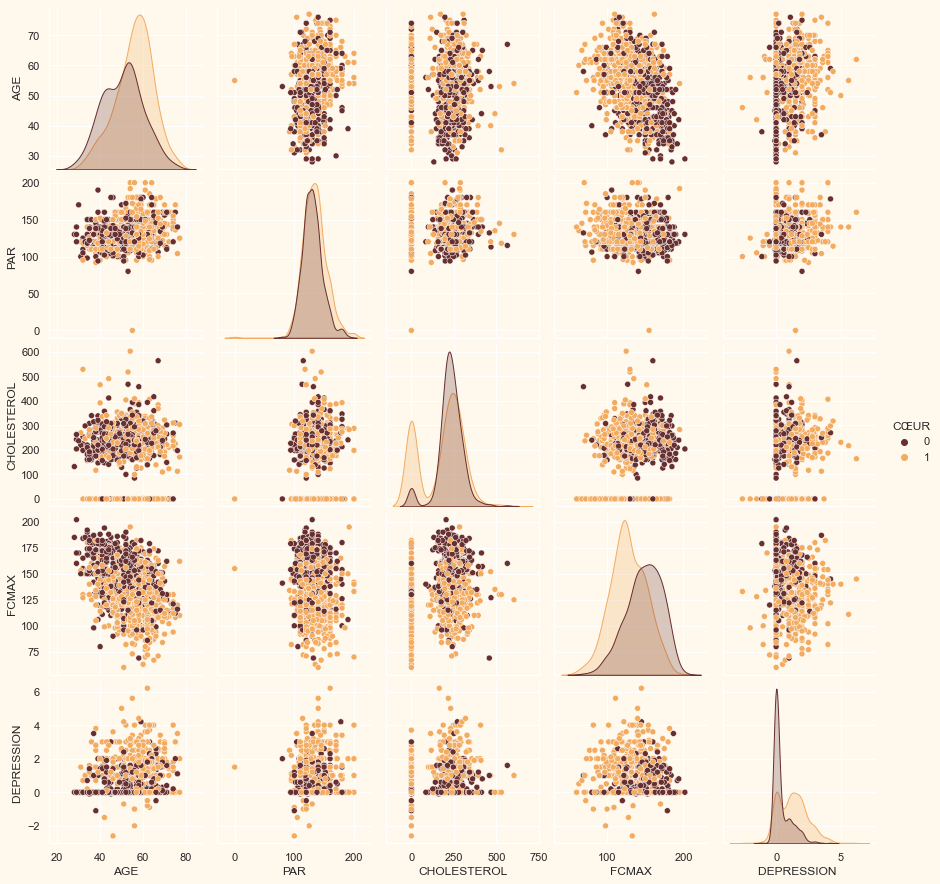

In [76]:
# VISUALISATION DE CERTAINE VARIABLE

#configuration couleur
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = mp.colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#visualisation
To_Plot = ["AGE", "PAR", "CHOLESTEROL", "FCMAX", "DEPRESSION ", 'CŒUR']
#print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "CŒUR",palette= (["#682F2F","#F3AB60"]))

plt.show()

## Suppression des valeurs aberantes

In [80]:
data = data[(data["PAR"]<170)]

data = data[(data["CHOLESTEROL"]<400)]

data = data[(data["FCMAX"]>70)]

data = data[(data["DEPRESSION "]>-2)]

data = data[(data["DEPRESSION "]<3.5)]

data = data[(data["CHOLESTEROL"]>100)]

data = data[(data["PAR"]>90)]

print("Apres suppression il nous reste :", len(data))


Apres suppression il nous reste : 680


## Visualisation apres suppression des valeurs aberante

<Figure size 432x288 with 0 Axes>

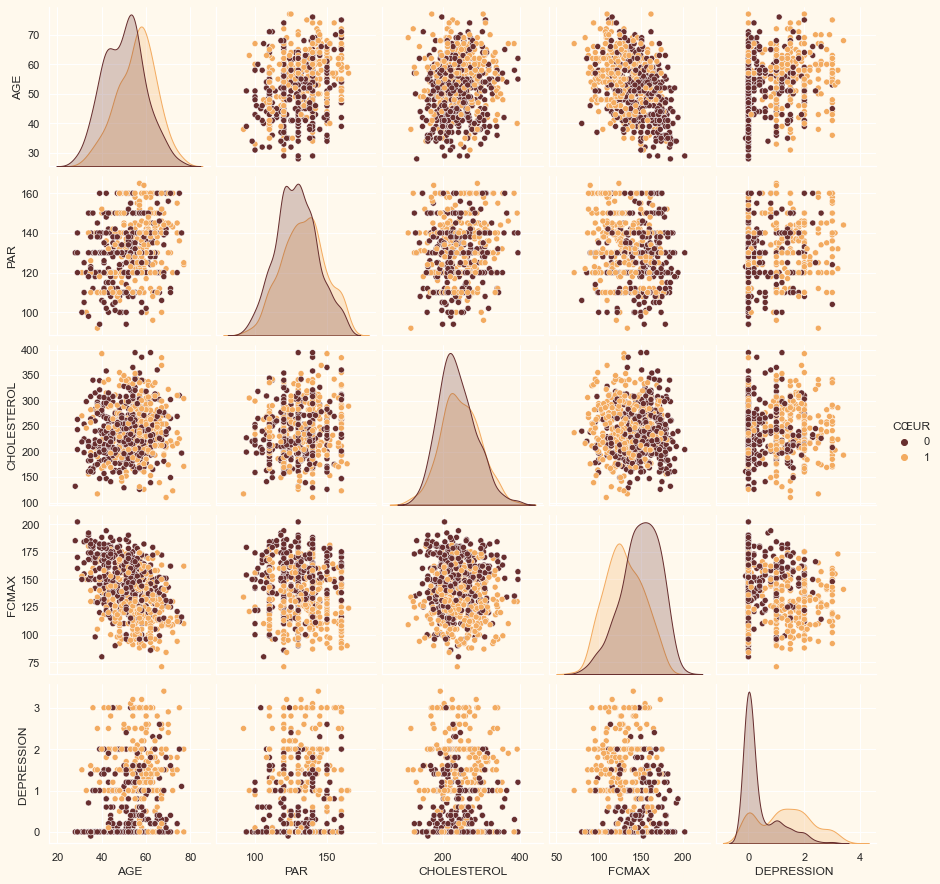

In [81]:
#configuration couleur
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = mp.colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#visualisation
To_Plot = ["AGE", "PAR", "CHOLESTEROL", "FCMAX", "DEPRESSION ", 'CŒUR']
#print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "CŒUR",palette= (["#682F2F","#F3AB60"]))

plt.show()

## Normaliser les variables quantitatives

In [100]:
quant_data = data[["AGE", "PAR", "CHOLESTEROL", "FCMAX", "DEPRESSION ",]]

In [ ]:
transformer = RobustScaler().fit(quant_data)
data_quant_n = transformer.transform(quant_data)

## Encoder les variables qualitatives

In [94]:
data_categorical = data[['SEXE', 'TDT', 'ECG', 'ANGINE', 'PENTE']]

In [95]:
encoder = OneHotEncoder(sparse=False, drop='if_binary')
data_categorical_enco = encoder.fit_transform(data_categorical)
data_categorical_encode = pd.DataFrame(data_categorical_enco, index = data_categorical.index)
data_categorical_encode.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [99]:
data_categorical_encode.columns = encoder.get_feature_names(data_categorical.columns)
data_categorical_encode.head()

,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Concatenation des variables qualitatives encoder et les variables quantitatives

In [101]:
df = pd.concat([data_categorical_encode, quant_data], axis = 1)

In [102]:
df.head()

,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40,140,289,172,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,49,160,180,156,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37,130,283,98,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,48,138,214,108,1.5
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,54,150,195,122,0.0


## Test de correlation

<AxesSubplot:title={'center':'Correlation avec la variable cible'}>

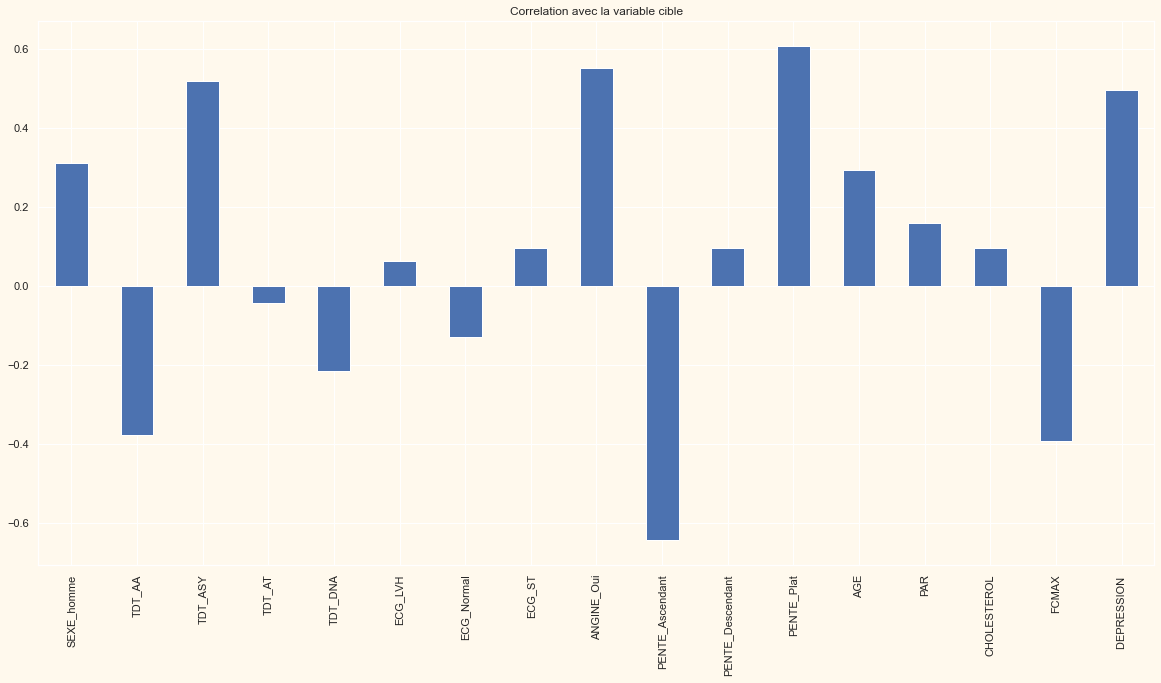

In [103]:
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',81)
#Pour l'affichage en entier
df.corrwith(data['CŒUR']).plot.bar(
        figsize = (20, 10), title = "Correlation avec la variable cible", fontsize = 11,
        rot = 90, grid = True)

In [106]:
df.columns

Index(['SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA', 'ECG_LVH',
       'ECG_Normal', 'ECG_ST', 'ANGINE_Oui', 'PENTE_Ascendant',
       'PENTE_Descendant', 'PENTE_Plat', 'AGE', 'PAR', 'CHOLESTEROL', 'FCMAX',
       'DEPRESSION '],
      dtype='object')

### On identifie 5 variables plus ou moins fortement correlées avec la variable cible selon la methode pearson

In [107]:
X = df[['TDT_ASY', 'ANGINE_Oui', 'PENTE_Ascendant', 'PENTE_Plat', 'DEPRESSION ']]
y = data['CŒUR']

# Modelisation

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [119]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [120]:
model.score(X_train,y_train)

0.8571428571428571

In [121]:
predict = model.predict(X_test)

In [124]:
target_names = ['Présence de la maladie', 'Absence de la maladie']

In [125]:
print(classification_report(y_test, predict, target_names=target_names))                                                     

                        precision    recall  f1-score   support

Présence de la maladie       0.89      0.86      0.87       117
 Absence de la maladie       0.86      0.88      0.87       108

              accuracy                           0.87       225
             macro avg       0.87      0.87      0.87       225
          weighted avg       0.87      0.87      0.87       225

